### **Description: This program detects breast cancer, based off of data.**

* **Dataset Link:** <http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29>

* The dataset was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. 

* He analyzed the cancer cell samples using a computer program called Xcyt, which is able to perform analysis on the cell features based on a digital scan.

* The program returned 10 features of each of the cell within each sample and computed mean value, extreme value and standard error of each feature.

### **1. Data Import**

In this phase we import the data downloaded from the dataset into the repository.

In [10]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **2. Data pre-processing**

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model

In [4]:
# Count the number of rows and columns in the dataset
dataset.shape

(569, 33)

In [5]:
# Count the number of empty (NaN, NAN, na) values in each column
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Drop the column with all missing values 
dataset = dataset.dropna(axis=1)

In [8]:
# Get the new count of the number of rows and columns
dataset.shape

(569, 32)

In [11]:
# Get a count og the number of Malignant (M) ot Benign (B) cells
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


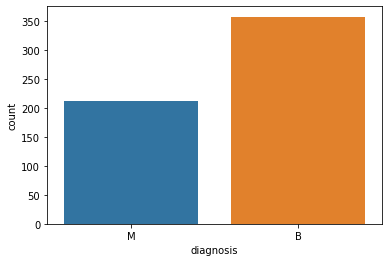

In [12]:
# Visualize the count 
sns.countplot(dataset['diagnosis'], label='count')

In [14]:
# Look at the data types to see which columns need to be encoded
dataset.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [21]:
# Encode the categorical data values (1: M, 0: B)
from sklearn.preprocessing import LabelEncoder
labelEncorder_Y = LabelEncoder()
dataset.iloc[:, 1] = labelEncorder_Y.fit_transform(dataset.iloc[:, 1].values)

### **3. Statistical analysis of data**

At this point we can analyze the data statistically in different ways. As an example, I decided to analyze the correlations of each column with the others.

In [118]:
# Get the correlation of the columns
dataset.iloc[:, 1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


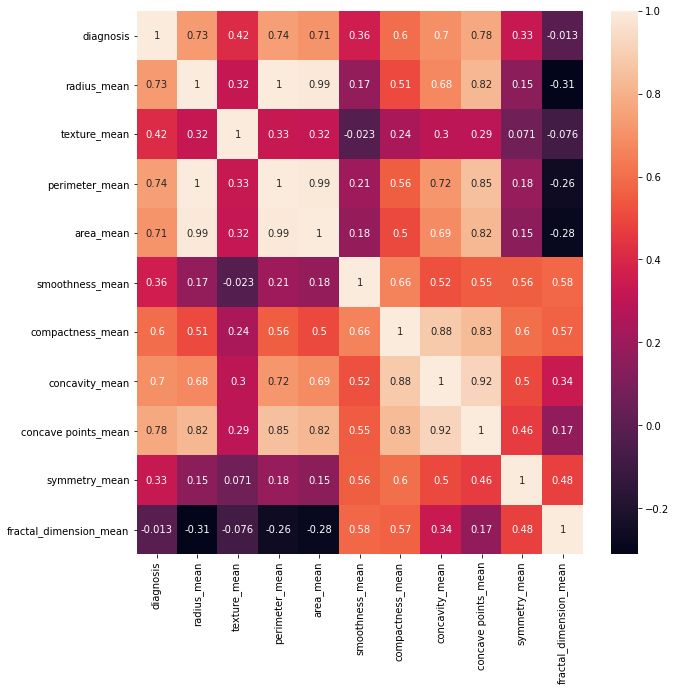

In [122]:
# Visualize the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.iloc[:, 1:12].corr(), annot=True)

### **4. Building predictive models to obtain predictions**

Here at this point we use classification algorithms to train our model to identify whether people have cancer or not. Below I used 4 classic classification algorithms.

In [68]:
# Split the dataset into independent (X) and dependent (Y) datasets
X = dataset.iloc[:, 2:31].values
Y = dataset.iloc[:, 1].values

In [69]:
# Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [71]:
# Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [110]:
# Create a function for the models 
def models(X_train, Y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # k-Nearest Neighbor Classifier (kNN)
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier 
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  # Print the models accuracy on the training data
  print('[0] Logistic Regression Training Accuracy: ', log.score(X_train, Y_train));
  print('[1] Decision Tree Classifier Training Accuracy: ', tree.score(X_train, Y_train));
  print('[2] k-Nearest Neighbor Classifier Training Accuracy: ', knn.score(X_train, Y_train));
  print('[3] Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train));

  return log, tree, knn, forest

### **4. Evaluation of results through metrics**

In this phase we evaluate each algorithm's metrics as the algorithm's hit accuracy.

In [109]:
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy:  0.9906103286384976
[1] Decision Tree Classifier Training Accuracy:  1.0
[2] k-Nearest Neighbor Classifier Training Accuracy:  0.9765258215962441
[3] Random Forest Classifier Training Accuracy:  0.9953051643192489


In [113]:
# Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]   # true positive
  TN = cm[1][1]   # true negative
  FN = cm[1][0]   # false negative
  FP = cm[0][1]   # false positive

  print(cm)
  print('Testing accuracy = ', (TP + TN)/(TP + TN + FN + FP))
  print()

Model 0
[[86  4]
 [ 3 50]]
Testing accuracy =  0.951048951048951

Model 1
[[83  7]
 [ 2 51]]
Testing accuracy =  0.9370629370629371

Model 2
[[89  1]
 [ 6 47]]
Testing accuracy =  0.951048951048951

Model 3
[[87  3]
 [ 2 51]]
Testing accuracy =  0.965034965034965



In [117]:
# Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model 2
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted av

In [116]:
# Print the prediction of Random Forest Classifier Model
pred = model[3].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


### **5. Results**

Below are the results of training and testing.

**Algorithm performance with known data:**
* Logistic Regression Training Accuracy:  **99.06%**
* Decision Tree Classifier Training Accuracy:  **100%**
* K-Nearest Neighbor Classifier Training Accuracy:  **97.65%**
* Random Forest Classifier Training Accuracy:  **99.53%**

**Algorithm performance with unknown data:**
* Logistic Regression Training Accuracy:  **95.10%**
* Decision Tree Classifier Training Accuracy:  **93.70%**
* K-Nearest Neighbor Classifier Training Accuracy:  **95.10%**
* Random Forest Classifier Training Accuracy:  **96.50%**